<a href="https://colab.research.google.com/github/tiffanyndanu/KNN-NaiveBayes/blob/main/Copy_of_KNN_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**


# a) Specifying the Data Analytic Question

Determine whether a passenger survived the accident or not.

# b) Defining the Metric for success

The project will be a success when we are able to create a model to accurately predicts whether na passenger survived the titanic accident or not.

# c) Understanding the Context

Titanic was a British passenger liner owned by the White Star Line that perished in the North Atlantic Ocean early on April 15, 1912, after colliding with an iceberg on her first journey from Southampton to New York City. More than 1,500 passengers and crew members died, making the sinking one of the deadliest unforgivable commercial marine catastrophes in contemporary history.

# d) Recording the Experimental Design

The following are the steps taking during the study:

1.Read and exploring the dataset.

2.Define the appropriateness of the available data to answer the given question.

3.Find and deal with outliers, anomalies and missing data within the dataset.

4.Perform univariate, bivariate and multi-variate analysis recording observations.

5.Build our classification models using KNN.

6.Do different dataset splits(80-20, 70-30, 60-40) for the train and test set and make observations of the model performance.

7.Optimize model performance and challenge the solution.

8.Give a conclusion and recommendations from the analysis.

# e) Data Relevance

The data provided is very relevant and has a wide range of variables to consider in achieving our main objective of this project.

# **2. Reading the Data**

In [60]:
#importing our necessary libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [61]:
# Loading the Data from the source i.e. csv

train = pd.read_csv('/content/train (5).csv')
test = pd.read_csv('/content/test (1).csv')

# **3. Checking the Data**

In [62]:
# Determining the no. of records in our dataset
#
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [63]:
# Preview of the train dataset

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
# Preview of the test dataset

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [66]:
# Doing the same for the test dataset

test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# **4. Cleaning**

In [67]:
# converting the column names to lowercase
# 
train.columns = train.columns.str.lower()
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [68]:
# Checking for Anomalies
# 
train.duplicated().sum()

0

In [69]:
# Identifying the Missing Data
#
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [70]:
# Filling the missing age values with the mean

train.groupby(['pclass', 'sex'])['age'].mean()

[train['age'].fillna(train.groupby(['pclass','sex'])['age'].transform('mean'), inplace=True)]

[None]

In [71]:
# drop the cabin column since it has about 77% missing values
# 
train.drop(['cabin'], axis=1, inplace=True)
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
# dropping the missing values in the embarked column
# 
train.dropna(inplace=True)

In [73]:
# dropping the unnecessary columns
# 
train.drop(['passengerid', 'name', 'ticket'], axis=1, inplace=True)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


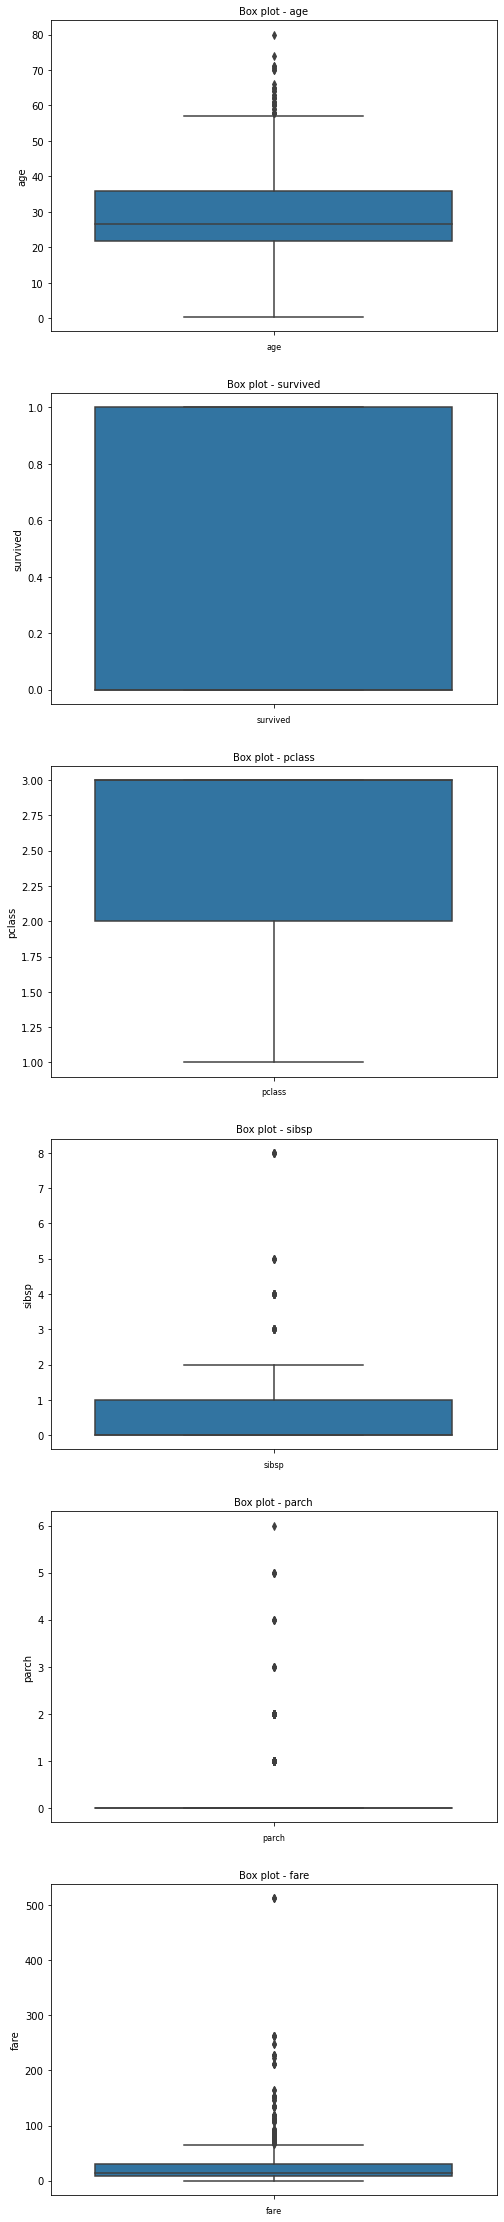

In [74]:
# checking for outliers
# 

import matplotlib.pyplot as plt
import seaborn as sns

num_col = ['age','survived', 'pclass', 'sibsp', 'parch', 'fare']

fig, ax = plt.subplots(len(num_col), figsize=(8,40))

for i, col_val in enumerate(num_col):

    sns.boxplot(y=train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [75]:
# Confirming the amount of outliers

df1 = train[['survived', 'pclass','sex', 'age', 'sibsp',
       'parch', 'fare', 'embarked']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


age          32
embarked      0
fare        114
parch       213
pclass        0
sex           0
sibsp        46
survived      0
dtype: int64

# **5. Exploratory Analysis**

# Univariate

In [76]:
# checking the statistical characteristics of the dataset

train.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.272115,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.247458,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.750000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


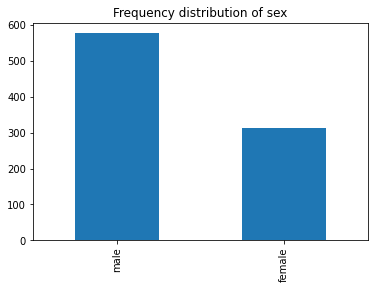

In [77]:
# plotting a bar chart to show the frequency distribution of sex
# 
train['sex'].value_counts().plot.bar(title='Frequency distribution of sex')

There were more men than women.

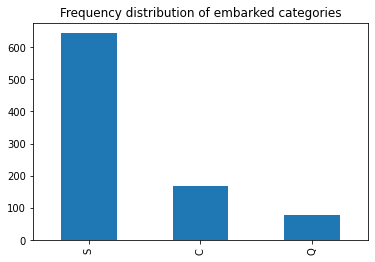

In [78]:
# plotting a barchart to show frequency distribution of embarked category
# 
train['embarked'].value_counts().plot.bar(title='Frequency distribution of embarked categories')

Most of them embarked at location S.

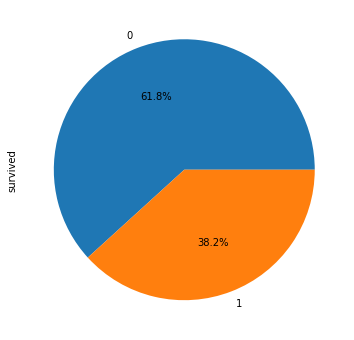

In [79]:
# survived variable piechart
#
labels = ['No', 'Yes']
plt.figure(figsize = (6, 6))
train.survived.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

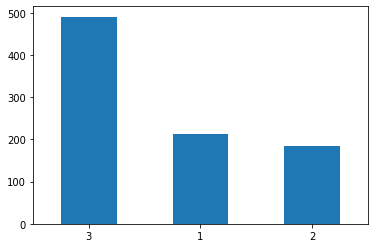

In [80]:
# plotting passenger class bar graph
#
train.pclass.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers were in 3rd class (585) followed by those in 1st class (314) followed by 2nd class (250).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

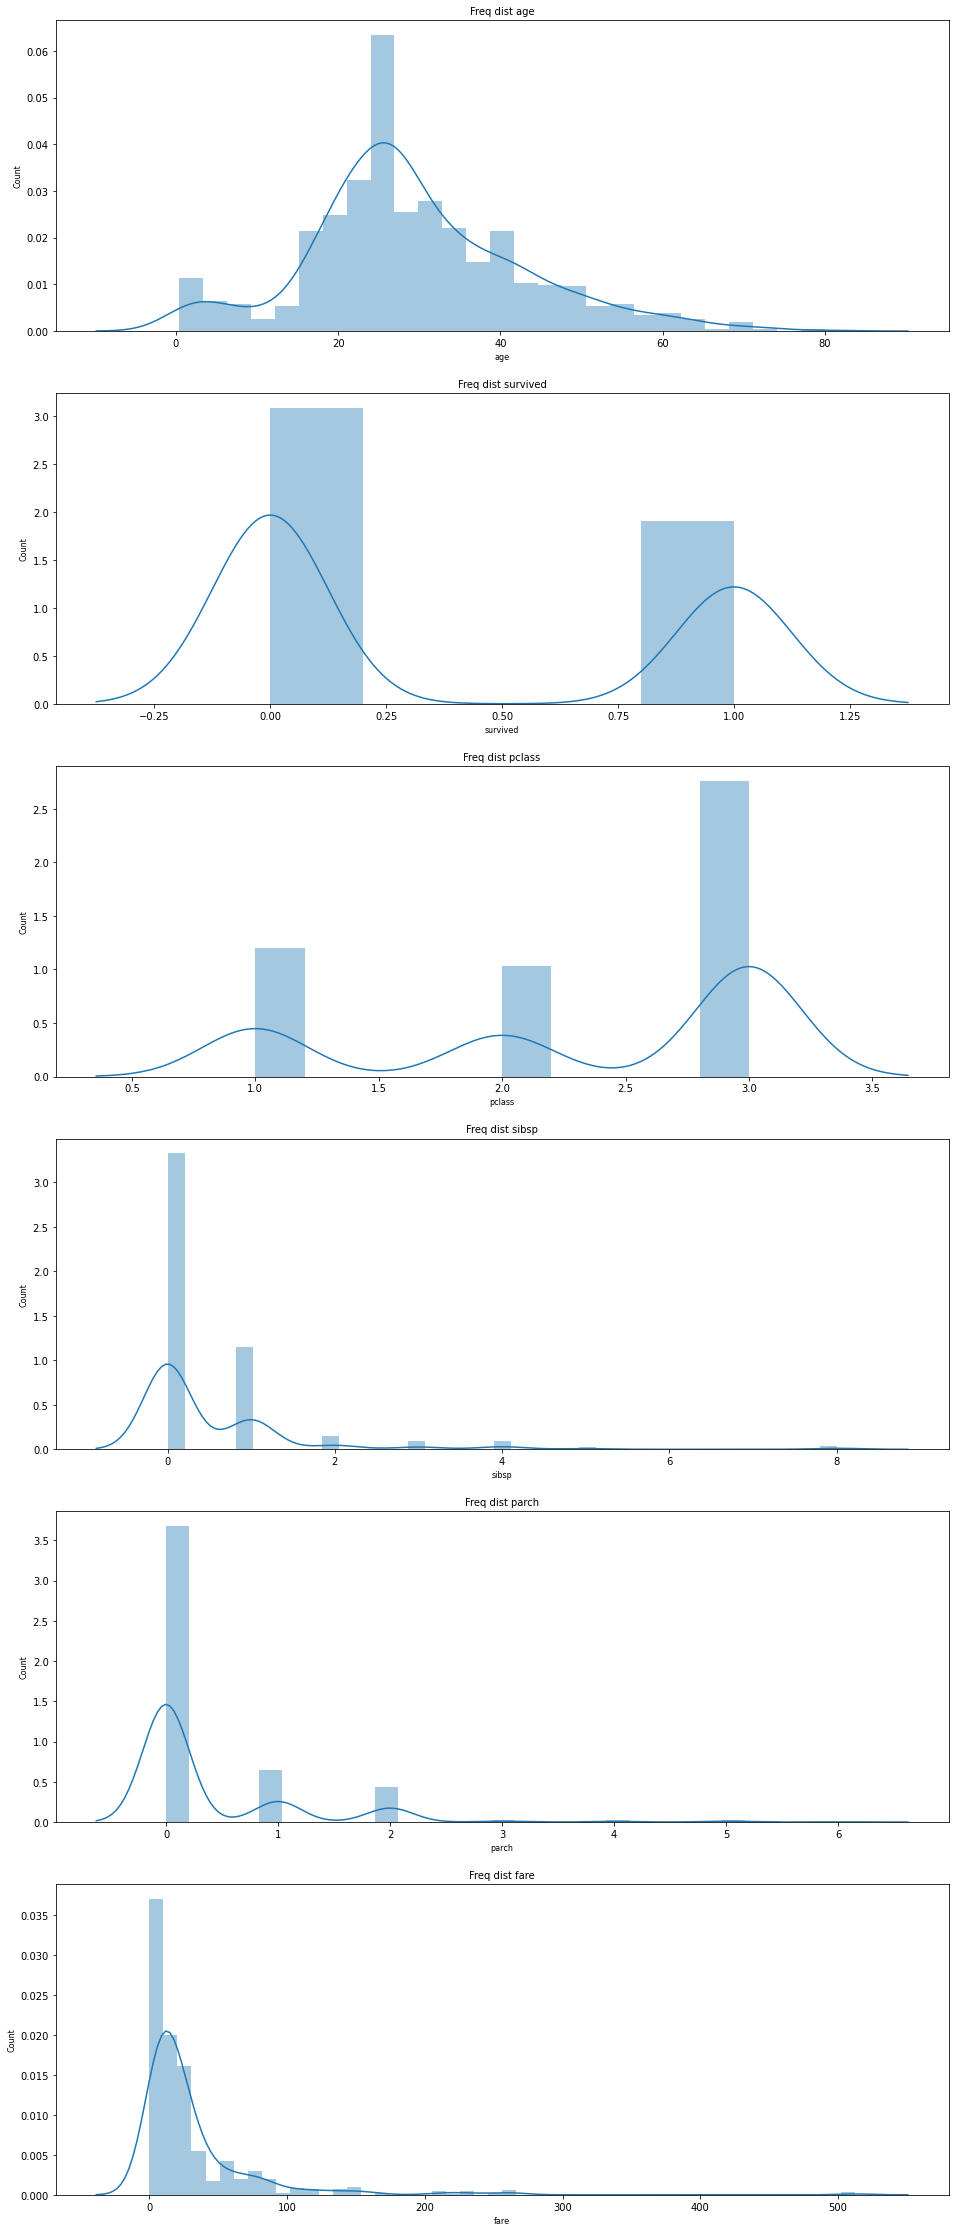

In [81]:
# Ploting a summary of the distribution of numerical columns which contains histograms and estimated PDF
#
num_col = ['age','survived', 'pclass', 'sibsp', 'parch', 'fare']

fig, ax = plt.subplots(len(num_col), figsize=(16,40))

for i, col_val in enumerate(num_col):

    sns.distplot(train[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

The age distribution appears to be normal and leptokurtic.

The distribution for the Fares is positively skewed with majority of the values occuring between 0 and 280 while peaking at between 0 to 50. This shows that there are a lot of outliers in this column. We will not remove them because they could prove to be necesssary in our research.

# Bivariate

Figuring out the effect of each independent variable on those who survived.

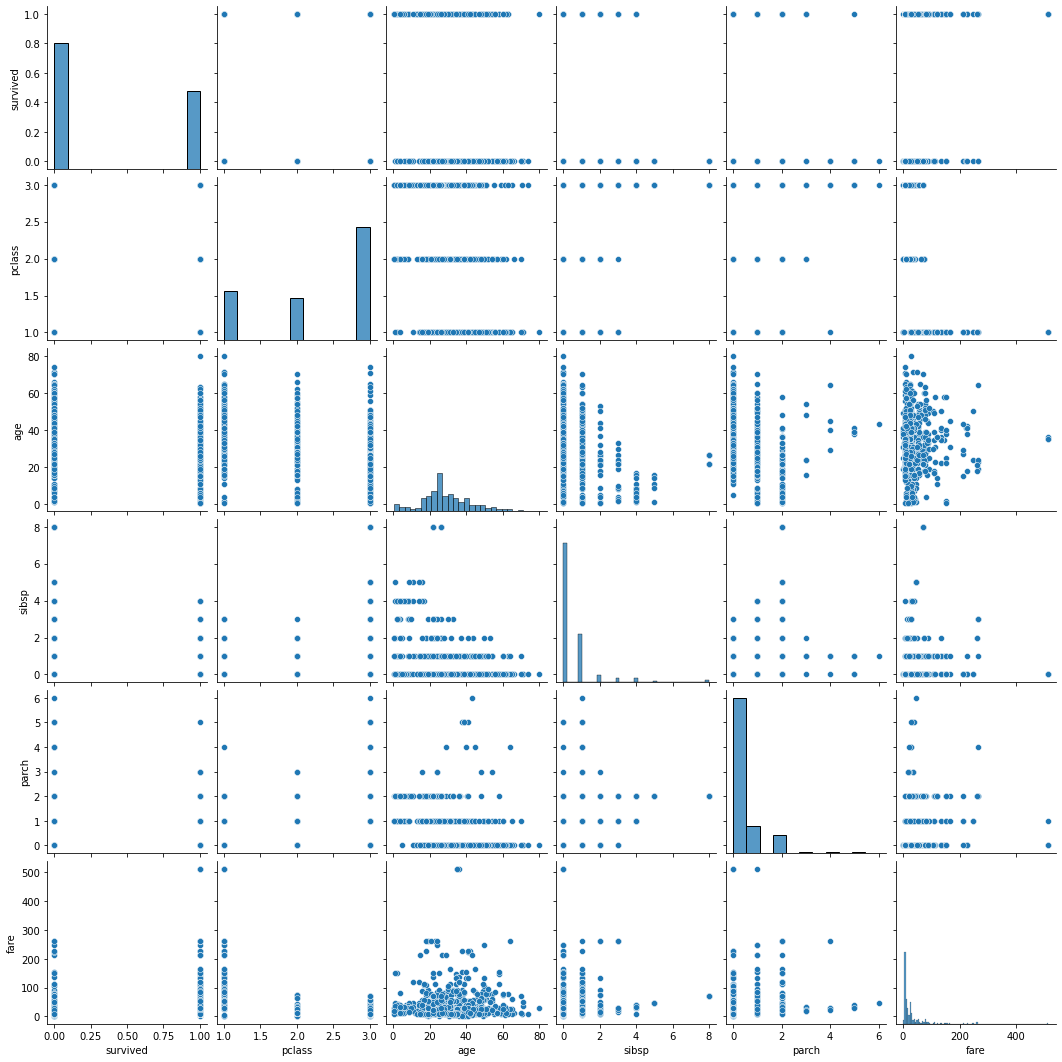

In [82]:
# Ploting the bivariate summaries and recording our observations
#
sns.pairplot(train)

In [83]:
# creating a correlation matrix
# 
correlations = train.corr()
correlations

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.335549,-0.072321,-0.034040,0.083151,0.255290
pclass,-0.335549,1.000000,-0.404114,0.081656,0.016824,-0.548193
age,-0.072321,-0.404114,1.000000,-0.250629,-0.179747,0.115477
sibsp,-0.034040,0.081656,-0.250629,1.000000,0.414542,0.160887
parch,0.083151,0.016824,-0.179747,0.414542,1.000000,0.217532
fare,0.255290,-0.548193,0.115477,0.160887,0.217532,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survied v Pclass')

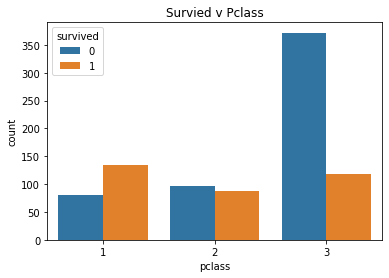

In [84]:
# Countplots of Passanger class and Survived 

sns.countplot(train['pclass'], hue= train['survived'])
plt.title('Survied v Pclass')

Of those who didn't surive, 296 were in 3rd class, 81 were in 2nd class and 77 were in 1st class. Of those who did survive, 133 were in 1st class, 103 were in 3rd class and 82 were in 2nd class.

It is clear that being in 1st class increased your chances of survival.

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.335549 -0.072321 -0.034040  0.083151  0.255290
pclass   -0.335549  1.000000 -0.404114  0.081656  0.016824 -0.548193
age      -0.072321 -0.404114  1.000000 -0.250629 -0.179747  0.115477
sibsp    -0.034040  0.081656 -0.250629  1.000000  0.414542  0.160887
parch     0.083151  0.016824 -0.179747  0.414542  1.000000  0.217532
fare      0.255290 -0.548193  0.115477  0.160887  0.217532  1.000000


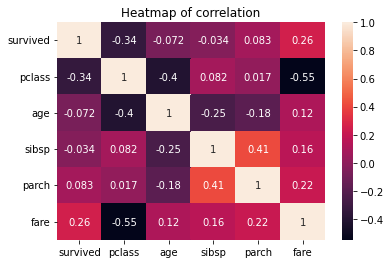

In [85]:
# Lets check for the correlarion and plot a heatmap to show the realtionship 
corr = train.corr()
print(corr)
plt.title('Heatmap of correlation')
sns.heatmap(corr, annot= True)

All our variables have Variance Inflation Factor (VIF) scores which are nowhere near 5, which would have made them really problematic. So we see that there is no need of dropping any columns.

# **6.Modelling**

# KNN

In [86]:
# splitting our data into attributes and label
X = train.drop(columns = ['survived']).values
y = train['survived'].values

# 80 - 20 split

In [87]:
# Implementing the Solution
# define our x and y
# 
test_features = train.columns.to_list()
test_features.remove('survived')

X = train[test_features]
X = pd.get_dummies(X)
y = train['survived'].values

In [88]:
# splitting data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [89]:
# scaling our features
# 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
# training our model KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [91]:
# make predictions with our trained model
# 
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
173,0,0
174,1,0
175,0,0
176,1,0


In [59]:
# evaluate performance of our model
# 
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73       105
           1       0.61      0.48      0.54        73

    accuracy                           0.66       178
   macro avg       0.65      0.63      0.64       178
weighted avg       0.66      0.66      0.65       178

[[83 22]
 [38 35]]
model accuracy 0.6629213483146067


# 70-30 split

In [92]:
# Implementing the Solution
# define our x and y
# 
test_features = train.columns.to_list()
test_features.remove('survived')

X = train[test_features]
X = pd.get_dummies(X)
y = train['survived'].values

In [93]:
# splitting data into train and test sets
# 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [94]:
# scaling our features
# 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
# train our model KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [96]:
# making predictions with our trained model
# 
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
262,0,0
263,1,0
264,1,0
265,0,0


In [97]:
# evaluate performance of our model
# 
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.81      0.65      0.72       110

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267

[[140  17]
 [ 39  71]]
model accuracy 0.7902621722846442


There is a great improvement in the accuracy score.

# 60-40 split

In [98]:
# defining our x and y
# 
test_features = train.columns.to_list()
test_features.remove('survived')

X = train[test_features]
X = pd.get_dummies(X)
y = train['survived'].values

In [99]:
# splitting data into train and test sets
# 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [100]:
# scaling our features
# 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
# train our model KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [102]:
# making predictions with our trained model
# 
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
351,1,0
352,1,1
353,0,0
354,0,0


In [103]:
# evaluate performance of our model
# 
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       216
           1       0.80      0.64      0.71       140

    accuracy                           0.79       356
   macro avg       0.80      0.77      0.78       356
weighted avg       0.80      0.79      0.79       356

[[193  23]
 [ 50  90]]
model accuracy 0.7949438202247191


There was a very slight improvement in the accuracy score.

# **7. Conclusion**

To conclude, we see that the accuracy score is highest for the 60-40 split without any hyperparameter tuning (79.6%). 

# **8. Recommendations**

We'd recommend the use of 60-40 split while using the model for classification problem.


KNN did a decent job in answering our data analytic question, however the accuracy score is a bit low and would need improvement maybe through hyperparameter tuning.

# **9. Follow up questions**

a). Did we have the right data?

Yes we did, we had a good sample size that looked into key factors that would help us create a model that would predict if a person survived or not.

b). Do we need other data to answer our question?

No, the dataset we used answered our question.

c). Did we have the right question?

Yes we did, we were able to create models that helped accurately predict whether a person survived or not.